In [7]:
# 라이브러리 호출
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AvgPool2D, Flatten

In [8]:
def LeNet_5():
    # 모델 생성
    model = Sequential()

    # 네트워크 구성
    model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', 
                     kernel_initializer = 'random_normal', bias_initializer = 'random_normal', input_shape=(32,32,1)))
    model.add(AvgPool2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh',
                    kernel_initializer = 'random_normal', bias_initializer = 'random_normal'))
    model.add(AvgPool2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh',
                    kernel_initializer = 'random_normal', bias_initializer = 'random_normal'))
    model.add(Flatten())
    model.add(Dense(84, activation='tanh',
                   kernel_initializer = 'random_normal', bias_initializer = 'random_normal'))
    model.add(Dense(10, activation='softmax',
                   kernel_initializer = 'random_normal', bias_initializer = 'random_normal'))

    # 컴파일
    model.compile(optimizer='Adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # 네트워크 구성 출력
    print(model.summary())
    
    return model

# cifar10 데이터로 테스트

In [9]:
# 라이브러리 호출
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# cifar10 데이터셋 로드
(x_data_org, y_target), (x_test_org, y_test) = cifar10.load_data()

# 빈 array 생성
x_data = np.zeros((x_data_org.shape[0], 32, 32)) 
x_test = np.zeros((x_test_org.shape[0], 32, 32))

# 컬러 -> 흑백
for i in range(len(x_data_org)):
    x_data[i] = cv2.cvtColor(x_data_org[i], cv2.COLOR_BGR2GRAY)
for i in range(len(x_test_org)):
    x_test[i] = cv2.cvtColor(x_test_org[i], cv2.COLOR_BGR2GRAY)

# 모델과 동일한 형태로 데이터셋 변형
x_data = x_data.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

# train 데이터와 val 데이터 나눠주기
x_train, x_val, y_train, y_val = train_test_split(x_data, y_target)

In [10]:
# 데이터셋 shape 확인
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(37500, 32, 32, 1) (12500, 32, 32, 1) (10000, 32, 32, 1)
(37500, 1) (12500, 1) (10000, 1)


In [11]:
# 모델 생성
model = LeNet_5()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [12]:
# Train
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=30,
                    verbose=1)

Epoch 1/30
1172/1172 [==============================] - 5s 3ms/step - loss: 1.8416 - accuracy: 0.3266 - val_loss: 1.6604 - val_accuracy: 0.4054
Epoch 2/30
1172/1172 [==============================] - 4s 3ms/step - loss: 1.6129 - accuracy: 0.4222 - val_loss: 1.5499 - val_accuracy: 0.4466
Epoch 3/30
1172/1172 [==============================] - 4s 3ms/step - loss: 1.5157 - accuracy: 0.4590 - val_loss: 1.5810 - val_accuracy: 0.4430
Epoch 4/30
1172/1172 [==============================] - 4s 3ms/step - loss: 1.4415 - accuracy: 0.4876 - val_loss: 1.4627 - val_accuracy: 0.4873
Epoch 5/30
1172/1172 [==============================] - 4s 3ms/step - loss: 1.3762 - accuracy: 0.5131 - val_loss: 1.4418 - val_accuracy: 0.4946
Epoch 6/30
1172/1172 [==============================] - 4s 3ms/step - loss: 1.3325 - accuracy: 0.5287 - val_loss: 1.4378 - val_accuracy: 0.4966
Epoch 7/30
1172/1172 [==============================] - 4s 3ms/step - loss: 1.2811 - accuracy: 0.5485 - val_loss: 1.4082 - val_accuracy:

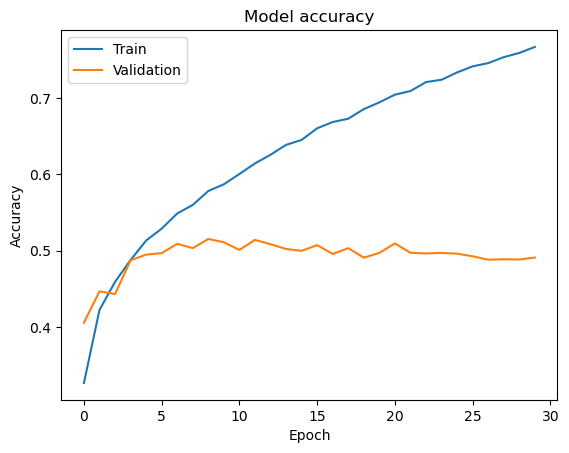

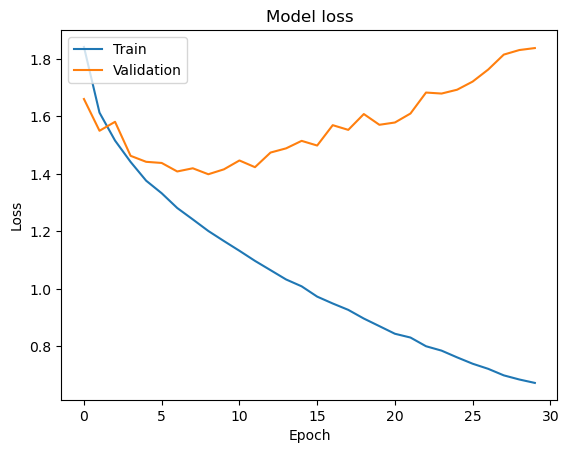

In [13]:
# 그래프로 accuracy와 loss 확인

import matplotlib.pyplot as plt

# train accuracy와 val_accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# train loss와 val_loss 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8116 - accuracy: 0.4911


[1.8116176128387451, 0.491100013256073]

In [75]:
# test loss : 1.8116176128387451
# test accuracy : 0.491100013256073

In [15]:
# Inference
pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=1).reshape(-1, 1)
print('\ntest 데이터의 Accuracy :',(sum(y_pred == y_test) / len(y_test) * 100)[0], '%')

313/313 [==============================] - 1s 2ms/step

test 데이터의 Accuracy : 49.11 %


In [16]:
for i in range(len(history.history['accuracy'])):
    print(f'Epoch {i+1} train acc와 val acc의 차이 :', round(abs(history.history['accuracy'][i] - history.history['val_accuracy'][i]), 4))

Epoch 1 train acc와 val acc의 차이 : 0.0788
Epoch 2 train acc와 val acc의 차이 : 0.0243
Epoch 3 train acc와 val acc의 차이 : 0.0161
Epoch 4 train acc와 val acc의 차이 : 0.0003
Epoch 5 train acc와 val acc의 차이 : 0.0185
Epoch 6 train acc와 val acc의 차이 : 0.0321
Epoch 7 train acc와 val acc의 차이 : 0.0397
Epoch 8 train acc와 val acc의 차이 : 0.0566
Epoch 9 train acc와 val acc의 차이 : 0.0629
Epoch 10 train acc와 val acc의 차이 : 0.0759
Epoch 11 train acc와 val acc의 차이 : 0.0994
Epoch 12 train acc와 val acc의 차이 : 0.1001
Epoch 13 train acc와 val acc의 차이 : 0.1172
Epoch 14 train acc와 val acc의 차이 : 0.1363
Epoch 15 train acc와 val acc의 차이 : 0.1452
Epoch 16 train acc와 val acc의 차이 : 0.153
Epoch 17 train acc와 val acc의 차이 : 0.1727
Epoch 18 train acc와 val acc의 차이 : 0.1695
Epoch 19 train acc와 val acc의 차이 : 0.1946
Epoch 20 train acc와 val acc의 차이 : 0.1971
Epoch 21 train acc와 val acc의 차이 : 0.1949
Epoch 22 train acc와 val acc의 차이 : 0.2118
Epoch 23 train acc와 val acc의 차이 : 0.2244
Epoch 24 train acc와 val acc의 차이 : 0.2267
Epoch 25 train acc와 val ac

# Summary
<br><br>
학습이 진행될수록 train 데이터의 정확도는 올라가고 손실은 낮아지지만<br><br>
validation 데이터는 5 epochs 이후 정확도는 약 49%를 유지하고 손실은 점점 커지는 경향을 보임<br><br>
test 데이터로 evaluate를 진행했을 때도 정확도가 49.11%로 유사한 결과가 나옴<br><br>
<br><br>
-> epochs가 5 ~ 10 사이일 때, train과 validation의 정확도가 차이가 크지 않지만<br><br>
정확도가 약 49%정도로 성능이 좋지 못함. 그리고 학습이 진행될수록 과대적합이 점점 심해짐<br><br>
<br><br>
input_size에 맞춰주기 위해서 컬러 -> 흑백으로 이미지를 전처리하였고,<br><br>
그만큼 이미지를 식별할 수 있는 특성이 사라졌기때문에 학습이 잘 되지않는 것으로 추측<br><br>